<h1>
<center>
Module 2: Working with Decision Trees
</center>
</h1>
<div class=h1_cell>

<p>We will continue to work with the loan data. And we will put to use the wrangling concepts we saw in module 1.

</div>

<hr>
<h1>
1: Read in your data from assignment 1.
</h1>
<p>
<div class=h1_cell>
Here is what my added columns look like.
<p>
<img src='https://www.dropbox.com/s/krrytcxssezbn4i/week1_columns.png?raw=1'>
</div>

In [0]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
pd.set_option('display.max_columns', None)

In [0]:
with open('/content/gdrive/My Drive/class_tables/loan_wrangled_week1.csv', 'r') as f:
  loan_table = pd.read_csv(f)

loan_table.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,no_lam,filled_lam,pa_Rural,pa_Semiurban,pa_Urban,pa_nan,lam_bin,lam_Low,lam_Average,lam_High
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,146.412162,0,0,1,0,Low,1,0,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,128.000000,1,0,0,0,Low,1,0,0


<hr>
<h2>
Bring in our library
</h2>
<div class=h1_cell>
<p>
We built a library at the end of the Titanic notebook this week (week 2). Let's upload it and import it.
</div>

In [0]:
#Make sure we get accuracy	 f1	 informedness	 predictor_case
%who function

accuracy	 f1	 informedness	 predictor_case	 


<hr>
<h1>
2: Change column values
</h1>
<div class=h1_cell>
Before getting to building predictors, let's do a bit of wrangling. The column we are trying to predict, `Loan_Status`, is using `Y` and `N` - annoying. Change the values to 1 and 0 instead. And do not generate a new column for the replacement values - change them directly in `Loan_Status`. Note that I have not shown you how to do this. It's your chance to google for answers.
</div>

In [0]:

loan_table.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,no_lam,filled_lam,pa_Rural,pa_Semiurban,pa_Urban,pa_nan,lam_bin,lam_Low,lam_Average,lam_High
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,1,146.412162,0,0,1,0,Low,1,0,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,0,128.000000,1,0,0,0,Low,1,0,0


<hr>
<h1>
3: Build a stump using Credit_History
</h1>
<p>
<div class=h1_cell>
<p>
You may notice that the Credit_History column is already in semi-binary format: float versions of  0 and 1. Do we really have to one-hot encode it? It's a bit of a subjective question. My view is that we should be able to replace a 1 with a Yes/True and a 0 with a No/False. But what is actually being represented is 1 = good and 0 = bad. I think it should be one-hot encoded. And further, I'd like the columns you generate to be `ch_good`, `ch_bad`, `ch_nan`. Let's take it one step at time.
  <p>
    You may ask, as I did, why Credit_History has float values when it is binary and should be an int. The answer is that if a column contains a `NaN`, you cannot have an `int` type for the column. They are working on the problem. See here: https://stackoverflow.com/questions/11548005/numpy-or-pandas-keeping-array-type-as-integer-while-having-a-nan-value. In particular, there is a method, `to_numeric`, that you can apply to a column to change its type to `int`.  But if you try it on `Credit_History`, it has no effect.
<p>
Go ahead and one-hot encode the Credit_History column. You should end up wtih `ch_0.0`, `ch_1.0`,  `ch_nan`. 

</div>

In [0]:
#do one-hot encoding on Credit_History




In [0]:
loan_table.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,no_lam,filled_lam,pa_Rural,pa_Semiurban,pa_Urban,pa_nan,lam_bin,lam_Low,lam_Average,lam_High,ch_0.0,ch_1.0,ch_nan
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,1,146.412162,0,0,1,0,Low,1,0,0,0,1,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,0,128.000000,1,0,0,0,Low,1,0,0,0,1,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,0,66.000000,0,0,1,0,Low,1,0,0,0,1,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,0,120.000000,0,0,1,0,Low,1,0,0,0,1,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,0,141.000000,0,0,1,0,Low,1,0,0,0,1,0


<div class=just_text>
Now rename the 2 columns to `ch_bad` and `ch_good`.
</div>

In [0]:
#rename columns


loan_table.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,no_lam,filled_lam,pa_Rural,pa_Semiurban,pa_Urban,pa_nan,lam_bin,lam_Low,lam_Average,lam_High,ch_bad,ch_good,ch_nan
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,1,146.412162,0,0,1,0,Low,1,0,0,0,1,0


<div class=just_text>
Now build the predictor using `ch_good` as the single node/question. A good credit history leads to a prediction of 1 else 0.
</div>

In [0]:
#build the predictor - call it loan_predictor_1

def loan_predictor_1(row):


In [0]:
#start a results table
loan_results = loan_table[['Loan_Status']].copy()

In [0]:
#create a new column `pred_1` with your predictions



loan_results.head(1)

,Loan_Status,pred_1
0,1,1



<h2>
Classify results
</h2>
<p>
<div class=h1_cell>
Build a new column `pred_1_type`.
</div>

In [0]:
#new pred_1_type column - use predictor_case from your library



In [0]:
loan_results.tail()

,Loan_Status,pred_1,pred_1_type
609,1,1,true_positive
610,1,1,true_positive
611,1,1,true_positive
612,1,1,true_positive
613,0,0,true_negative


<div class=just_text>
Now build the series that contains the count of all 4 types.
</div>

In [0]:
#new series called p1_types


p1_types

true_positive     378
false_positive     97
true_negative      95
false_negative     44
Name: pred_1_type, dtype: int64

In [0]:
#what is straight accuracy? Use function from your library

accuracy(p1_types)

0.7703583061889251

<hr>
<h1>
4: Build a more complicated tree
</h1>
<div class=h1_cell>
Here is your target:
<p>
<img src='https://www.dropbox.com/s/kgj6ms46nacjny5/bushy_loan.png?raw=1'  width="400" height="400">
<p>
</div>

In [0]:
# build the predictor - call it predictor_2.

def loan_predictor_2(row):


In [0]:
#create a new column `pred_2` with your predictions



loan_results.head(1)

,Loan_Status,pred_1,pred_1_type,pred_2
0,1,1,true_positive,1


In [0]:
#build pred_2_type column



loan_results.head(1)

,Loan_Status,pred_1,pred_1_type,pred_2,pred_2_type
0,1,1,true_positive,1,true_positive


In [0]:
#new series called p2_types


p2_types

true_positive     390
false_positive    128
true_negative      64
false_negative     32
Name: pred_2_type, dtype: int64

<hr>
<h1>
5: Compare the 2 predictors
</h1>
<div class=h1_cell>
First, do visualization called for then compute measures.
</div>

<h2>
Visualize the 2 predictors' results
</h2>
<p>
<div class=h1_cell>
Use a pie chart for each.
</div>

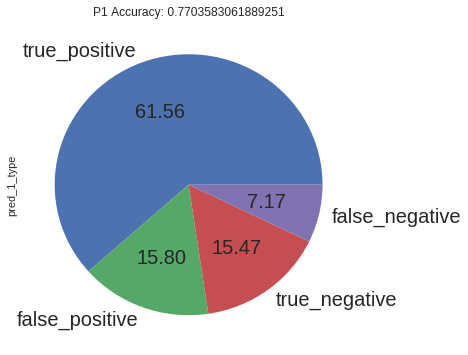

In [0]:
%matplotlib inline

#First predictor_1


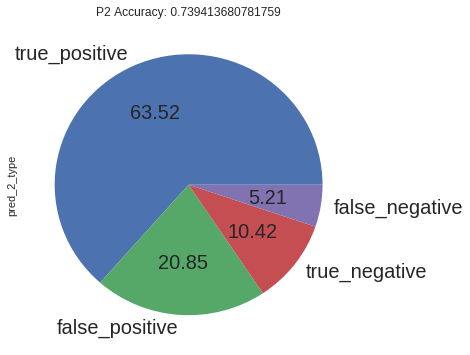

In [0]:
#Next predictor_2


In [0]:
accuracy(p2_types)

0.739413680781759


<h2>
The accuracy went down
</h2>
<p>
<div class=h1_cell>
It's a little counter-intuitive. We add more knowledge to the tree (more splits) but it harms us. In the next module, we will see a means to determine if the new branches we added are the best we can do (punchline: they are not).
</div>


<h2>
Compare F1 scores
</h2>
<p>
<div class=h1_cell>
As reminder, here is the table to use.
<p>

<img src='https://www.dropbox.com/s/zubecbzi8zsdzgg/confusion_matrix.png?raw=1'>

<div>

In [0]:
#compute F1 for the first predictor
f1(p1_types)

0.842809364548495

In [0]:
#compute F1 for the second predictor
f1(p2_types)

0.8297872340425533

<div class=just_text>
Not much difference in F1 scores.
</div>


<h2>
Compare informedness scores
</h2>
<p>
<div class=h1_cell>
You won't find this measure in the confusion matrix. We defined it while working with Titanic data.
<div>

In [0]:
#informedness for predictor 1

informedness(p1_types)

0.3905262638230649

In [0]:
#informedness for predictor 2

informedness(p2_types)

0.25750394944707744

<div class=just_text>
Relatively low for both.
</div>

<hr>
<h1>
6: Write out your tables to file
</h1>
<div class=h1_cell>
We will make use of them in future assignments.
</div>

In [0]:
loan_table.head(1)   # see the columns you are writing out

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,no_lam,filled_lam,pa_Rural,pa_Semiurban,pa_Urban,pa_nan,lam_bin,lam_Low,lam_Average,lam_High,ch_bad,ch_good,ch_nan
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,1,146.412162,0,0,1,0,Low,1,0,0,0,1,0


In [0]:
with open('/content/gdrive/My Drive/class_tables/loan_wrangled_week2.csv', 'w') as f:
  loan_table.to_csv(f, encoding='utf-8', index=False)

In [0]:
with open('/content/gdrive/My Drive/class_tables/loan_results_week2.csv', 'w') as f:
  loan_results.to_csv(f, encoding='utf-8', index=False)

<hr>
<h1>Next up</h1>
<div class=h1_cell>

    In the next module, we will turn our attention to measuring the effectiveness of nodes in the tree on an individual basis. We chose sex_female as the root in the two trees above. Why? Is some other question better? We will look at ways of answering this question.
</div>